In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
skthickness_mean=data['SkinThickness'].mean()
skthickness_mean

np.float64(20.536458333333332)

In [4]:
bmi_mean=data['BMI'].mean()
bmi_mean

np.float64(31.992578124999998)

In [5]:
age_mean=data['Age'].mean()
age_mean

np.float64(33.240885416666664)

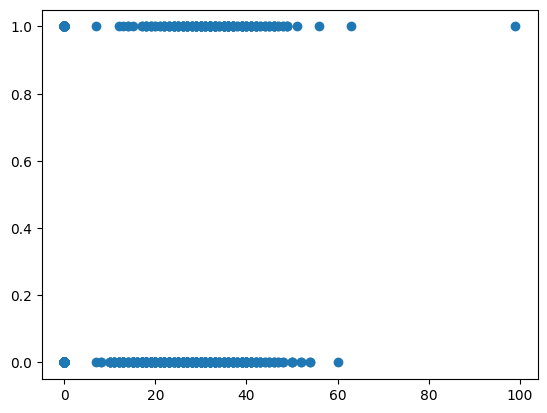

In [6]:
plt.scatter(data['SkinThickness'],data['Outcome'])
plt.show()

In [7]:
data['SkinThickness'].replace({0:skthickness_mean})

0      35.000000
1      29.000000
2      20.536458
3      23.000000
4      35.000000
         ...    
763    48.000000
764    27.000000
765    23.000000
766    20.536458
767    31.000000
Name: SkinThickness, Length: 768, dtype: float64

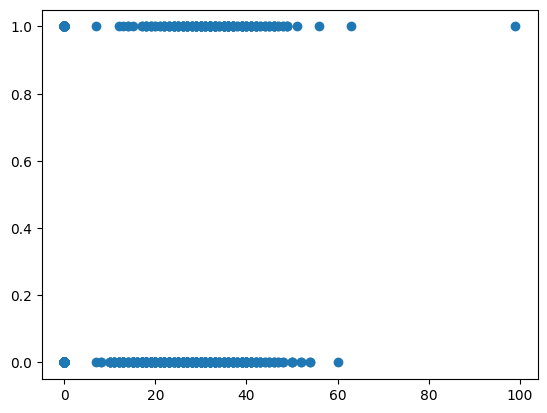

In [8]:
plt.scatter(data['SkinThickness'],data['Outcome'])
plt.show()

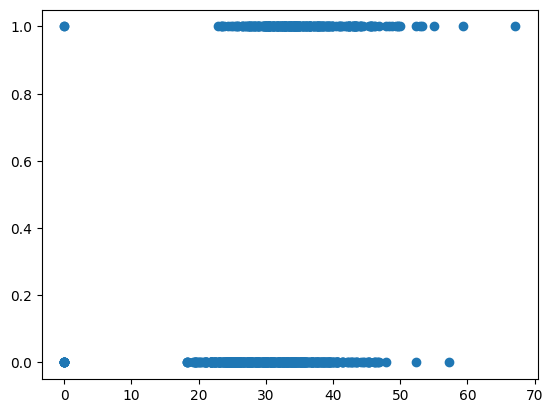

In [9]:
plt.scatter(data['BMI'],data['Outcome'])
plt.show()

In [10]:
data['BMI'].replace({0:bmi_mean})

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

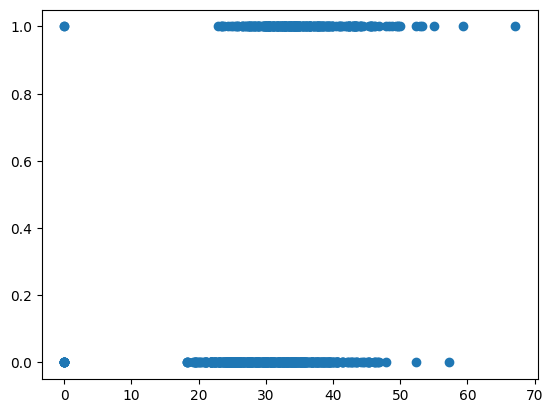

In [11]:
plt.scatter(data['BMI'],data['Outcome'])
plt.show()

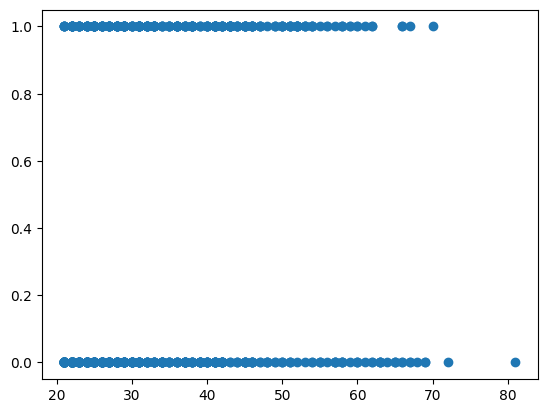

In [12]:
plt.scatter(data['Age'],data['Outcome'])
plt.show()

In [13]:
data['Age'].replace({0:age_mean})

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

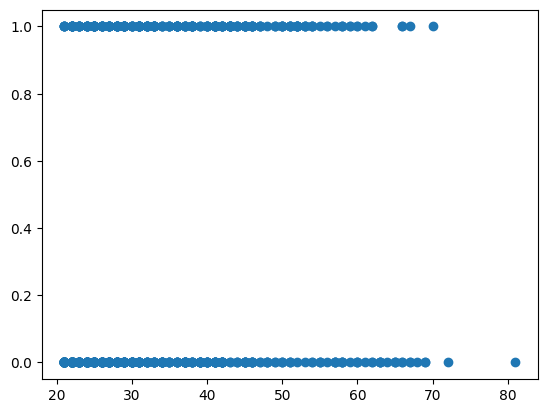

In [14]:
plt.scatter(data['Age'],data['Outcome'])
plt.show()

## Logistic Regression

In [15]:
x=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [16]:
y=data[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614, 1)
(154, 1)


In [18]:
from sklearn.linear_model import LogisticRegression
logReg=LogisticRegression()
logReg

LogisticRegression()

In [19]:
logReg.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logReg.predict(x_test[0:5])

array([0, 1, 0, 0, 0])

In [21]:
y_test[0:5]

,Outcome
575,0
206,1
127,0
550,0
118,0


In [22]:
y_pred=logReg.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7337662337662337

## Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
gini_classifier=DecisionTreeClassifier(criterion='gini')
gini_classifier

DecisionTreeClassifier()

In [26]:
gini_classifier.fit(x_train,y_train)
gini_classifier

DecisionTreeClassifier()

In [27]:
gini_classifier.score(x_test,y_test)

0.7142857142857143

[Text(0.4413967917675545, 0.96875, 'x[1] <= 127.5\ngini = 0.455\nsamples = 614\nvalue = [399, 215]'),
 Text(0.19665556900726391, 0.90625, 'x[7] <= 30.5\ngini = 0.294\nsamples = 379\nvalue = [311, 68]'),
 Text(0.3190261803874092, 0.9375, 'True  '),
 Text(0.13302058111380144, 0.84375, 'x[5] <= 45.4\ngini = 0.157\nsamples = 233\nvalue = [213, 20]'),
 Text(0.100181598062954, 0.78125, 'x[0] <= 6.5\ngini = 0.137\nsamples = 229\nvalue = [212, 17]'),
 Text(0.0635593220338983, 0.71875, 'x[5] <= 30.95\ngini = 0.117\nsamples = 225\nvalue = [211, 14]'),
 Text(0.01937046004842615, 0.65625, 'x[6] <= 0.672\ngini = 0.015\nsamples = 130\nvalue = [129, 1]'),
 Text(0.009685230024213076, 0.59375, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(0.029055690072639227, 0.59375, 'x[6] <= 0.697\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.01937046004842615, 0.53125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0387409200968523, 0.53125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text

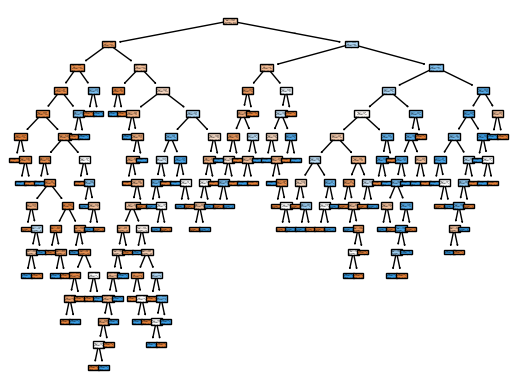

In [60]:
from sklearn import  tree
tree.plot_tree(gini_classifier,filled=True)

In [28]:
entropy_classifier=DecisionTreeClassifier(criterion='entropy')
entropy_classifier

DecisionTreeClassifier(criterion='entropy')

In [29]:
entropy_classifier.fit(x_train,y_train)
entropy_classifier

DecisionTreeClassifier(criterion='entropy')

In [30]:
entropy_classifier.score(x_test,y_test)

0.6948051948051948

## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()
sc

StandardScaler()

In [33]:
sc.fit(x_train)

StandardScaler()

In [34]:
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)
sc_classifier_gini=DecisionTreeClassifier(criterion='gini')
sc_classifier_gini

DecisionTreeClassifier()

In [35]:
sc_classifier_gini.fit(x_train_sc,y_train)
sc_classifier_gini

DecisionTreeClassifier()

In [36]:
sc_classifier_gini.score(x_test_sc,y_test)

0.6688311688311688

In [37]:
sc_classifier_entropy=DecisionTreeClassifier(criterion='entropy')
sc_classifier_entropy

DecisionTreeClassifier(criterion='entropy')

In [38]:
sc_classifier_entropy.fit(x_train_sc,y_train)
sc_classifier_entropy

DecisionTreeClassifier(criterion='entropy')

In [39]:
sc_classifier_entropy.score(x_test_sc,y_test)

0.7077922077922078

## Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
ranf_classifier=RandomForestClassifier(n_estimators=100,criterion='entropy')
ranf_classifier

RandomForestClassifier(criterion='entropy')

In [42]:
ranf_classifier.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy')

In [43]:
ranf_classifier.score(x_test,y_test)

0.7207792207792207

## Support vector machine

In [44]:
from sklearn.svm import SVC

In [45]:
svc_classifier=SVC(kernel='rbf')
svc_classifier.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [46]:
svc_classifier.score(x_test,y_test)

0.7272727272727273

In [47]:
svc_classifier.fit(x_train_sc,y_train)
svc_classifier.score(x_test_sc,y_test)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7077922077922078

In [48]:
svc_classifier_poly=SVC(kernel='poly')
svc_classifier_poly.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [49]:
svc_classifier_poly.score(x_test,y_test)

0.7337662337662337

In [50]:
svc_classifier_poly.fit(x_train_sc,y_train)
svc_classifier_poly.score(x_test_sc,y_test)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7077922077922078

In [51]:
svc_classifier_linear=SVC(kernel='linear')
svc_classifier_linear.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [52]:
svc_classifier_linear.score(x_test,y_test)

0.7207792207792207

## Naive Bayes Classifier Model

In [53]:
from sklearn.naive_bayes import GaussianNB
gauss_model=GaussianNB()
gauss_model.fit(x_train,y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [54]:
gauss_model.score(x_test,y_test)

0.7272727272727273

In [55]:
from sklearn.naive_bayes import MultinomialNB
multi_model = MultinomialNB()
multi_model.fit(x_train, y_train)
multi_model.score(x_test, y_test)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6233766233766234

In [56]:
from sklearn.naive_bayes import BernoulliNB
bernoulli_model = BernoulliNB()
bernoulli_model.fit(x_train, y_train)
bernoulli_model.score(x_test, y_test)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6428571428571429

## K Nearest Neighbor

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
knn_model.score(x_test,y_test)

0.6883116883116883

## bar graph

In [64]:
data.shape

(768, 9)

In [65]:
x=data['Age']
x

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [67]:
y=np.arange(0,768)

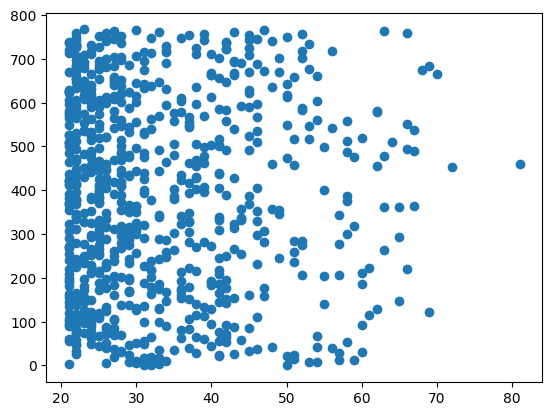

In [80]:
plt.scatter(x,y)

In [90]:
unqVal=data['Age'].value_counts()
unqVal

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
36    16
38    16
32    16
45    15
34    14
46    13
40    13
43    13
39    12
35    10
44     8
50     8
51     8
52     8
58     7
54     6
47     6
49     5
60     5
53     5
57     5
48     5
63     4
66     4
55     4
62     4
59     3
56     3
65     3
67     3
61     2
69     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [91]:
unique_counts_df = unqVal.reset_index()

unique_counts_df.columns = ['value', 'count']

In [92]:
unique_counts_df

,value,count
0,22,72
1,21,63
2,25,48
3,24,46
4,23,38
5,28,35
6,26,33
7,27,32
8,29,29
9,31,24


In [96]:
count_in_range_20_to_30=data[ (data['Age']>=20) & (data['Age']<=30) ].shape[0]
count_in_range_30_to_40=data[ (data['Age']>30) & (data['Age']<=40) ].shape[0]
count_in_range_40_to_50=data[ (data['Age']>40) & (data['Age']<=50) ].shape[0]
count_in_range_50_to_60=data[ (data['Age']>50) & (data['Age']<=60) ].shape[0]
count_in_range_60_to_70=data[ (data['Age']>60) & (data['Age']<=70) ].shape[0]
count_in_range_70_to_80=data[ (data['Age']>70) & (data['Age']<=81) ].shape[0]
print(count_in_range_20_to_30)
print(count_in_range_30_to_40)
print(count_in_range_40_to_50)
print(count_in_range_50_to_60)
print(count_in_range_60_to_70)
print(count_in_range_70_to_80)

417
157
113
54
25
2
